# Comparación de las métricas para las diferentes alternativas

Dadas las diferente alternativas estudiadas, se ha planteado una parametrización del algoritmo de generación de las bases de datos sobre las que se realiza la clasificación de los vasos sanguíneos.

## Parametría empleada

In [1]:
import PARAMETERS

"""
LBP_METHOD
----------
Defines the LBP algorithm version to be used.
· default: LBP original version [https://medium.com/@rajatanantharam/local-binary-patterns-8807ecf7f87c].
· riu: Rotation invariant version [https://www.researchgate.net/publication/221303862_Gray_Scale_and_Rotation_Invariant_Texture_Classification_with_Local_Binary_Patterns].
· riu2: Improved rotation invariance with uniform patterns [https://www.researchgate.net/publication/221303862_Gray_Scale_and_Rotation_Invariant_Texture_Classification_with_Local_Binary_Patterns].
"""  # noqa
PARAMETERS.LBP_METHOD = 'riu2'

"""
METHOD
------
Defines the dataset structure.
· get_pyramid_dataset: Generate a single dataset in which each variable is a scale of the original image. Therefore, a single classifier is used.
· get_datasets_by_scale: Generate a dataset for each scale. Therefore, a different classifier is applied for scale.
"""  # noqa
PARAMETERS.METHOD = 'get_pyramid_dataset'

"""
INTERPOLATION_ALGORITHM
-----------------------
Defines the interpolation algorithm to be used in the image rescaling process.
· nearest: Pick one nearest pixel from the input image. Ignore all other input pixels.
· bicubic: Cubic interpolation on all pixels that may contribute to the output value.
· lanczos: Calculate the output pixel value using a high-quality Lanczos filter.
"""
PARAMETERS.INTERPOLATION_ALGORITHM = 'nearest'

"""
BALANCE    <- ONLY for get_pyramid_dataset
-------
Whether to remove data from the train set in order to equalize the proportion of instances of each label.
· True
· False
"""
PARAMETERS.BALANCE = False

"""
N_SCALES
--------
Number of scales to use.
1 - 6
"""
PARAMETERS.N_SCALES = 6

"""
GRAY_INTENSITY    <- ONLY for get_pyramid_dataset
--------------
Whether to add a variable with the intensity of each pixel in the gray scale image.
· True
· False
"""
PARAMETERS.GRAY_INTENSITY = True

"""
X2SCALE
-------
Whether to add a scale with x2 resolution.
· True
· False
"""
PARAMETERS.X2SCALE = False


# Other parameters
PARAMETERS.PLOT = False
PARAMETERS.PLOT_LBP_LABEL = False
PARAMETERS.N_JOBS = 1
PARAMETERS.HEIGHT = 608
PARAMETERS.WIDTH = 576
PARAMETERS.FILE_EXTENSION = f"{PARAMETERS.LBP_METHOD}_{PARAMETERS.METHOD}_{PARAMETERS.INTERPOLATION_ALGORITHM}_balance-{PARAMETERS.BALANCE}_scales-{PARAMETERS.N_SCALES}_x2-{PARAMETERS.X2SCALE}_gray-intensity-{PARAMETERS.GRAY_INTENSITY}"

### Algoritmo de interpolación

A continuación se va muestra el resultado gráfico proporcionado por la aplicación de diferentes algoritmos de interpolación en el reescalado de las imágenes. Se aplica así mismo al gold standard con la finalidad de visualizar el efecto de la transformación a menores dimensiones.

En primer lugar se aplica una configuración inicial al algoritmo de generación de las bases de datos para que muestre los resultados esperados.

In [2]:
from create_db import main
%matplotlib inline

# Plot the LBP transformation result with the label
PARAMETERS.PLOT_LBP_LABEL = True
# Individual configuration for each scale
PARAMETERS.METHOD = 'get_datasets_by_scale'
# Scales
PARAMETERS.N_SCALES = 6

#### Nearest neighbor

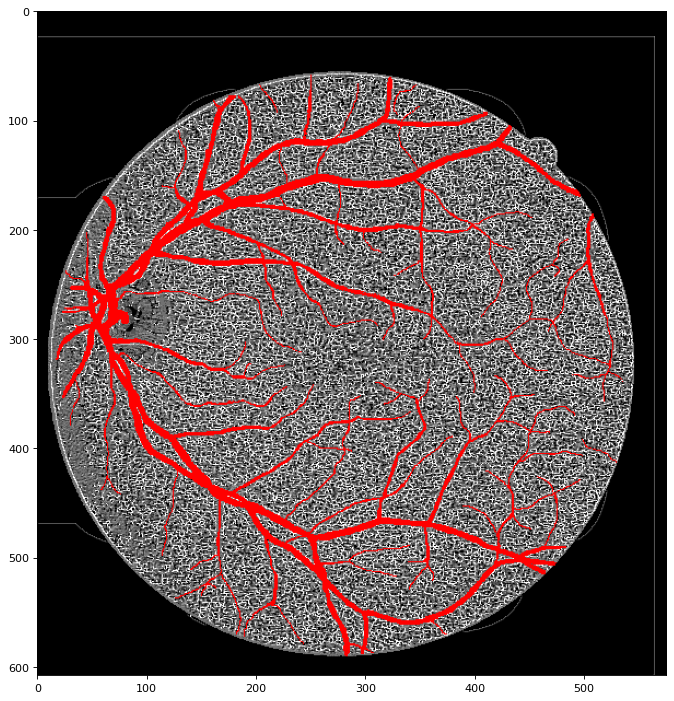

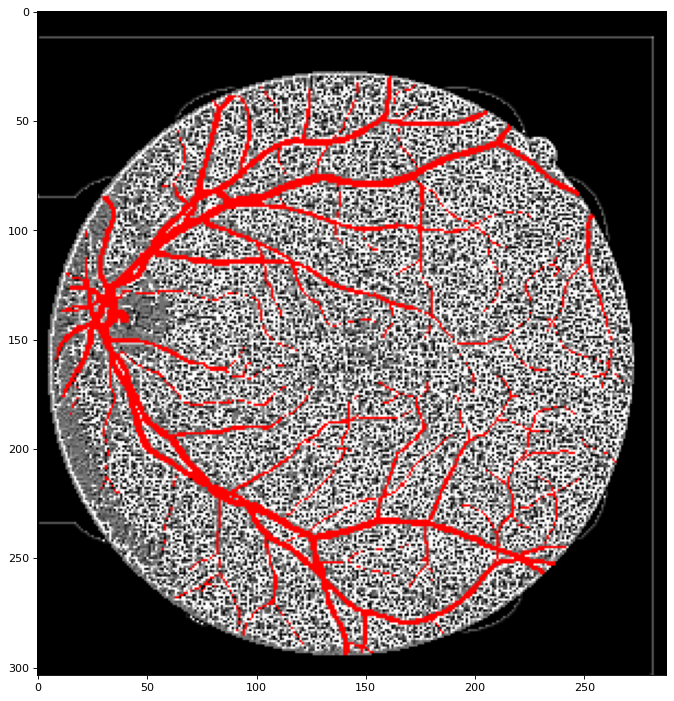

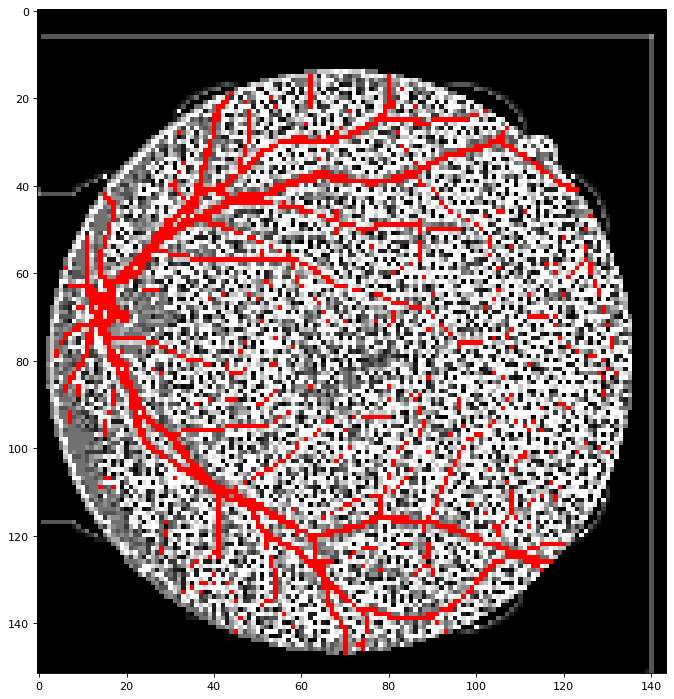

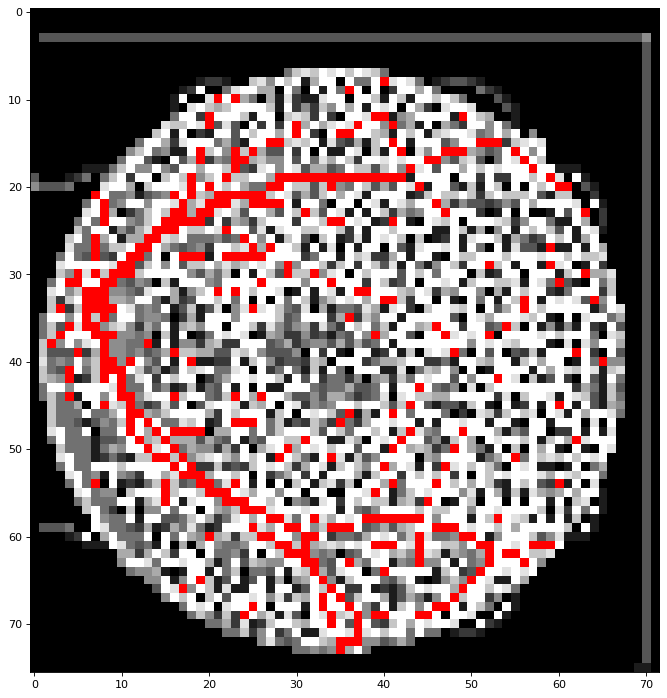

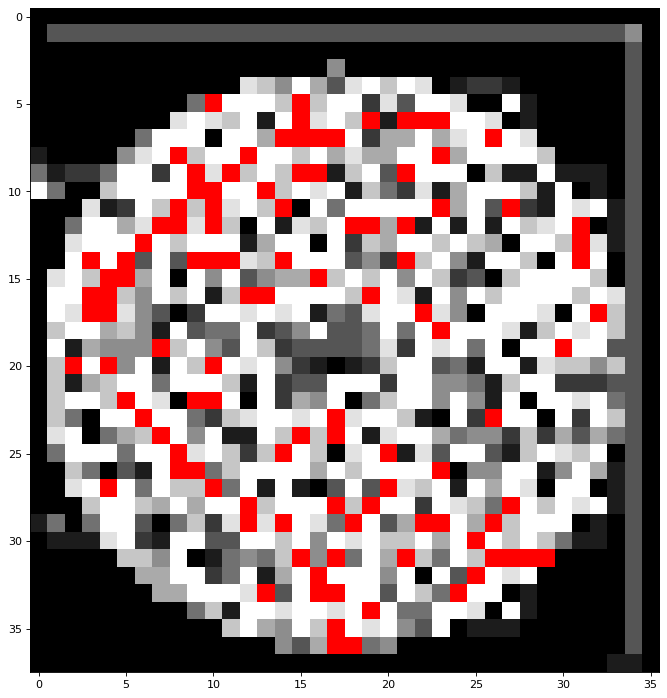

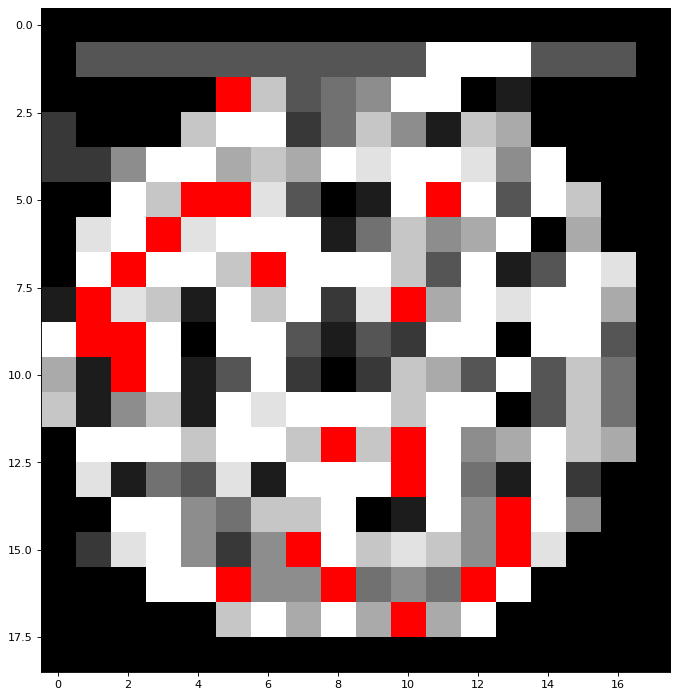

In [3]:
# Algorithm
PARAMETERS.INTERPOLATION_ALGORITHM = 'nearest'

# Execution for the first image
main(single_exec=True)

#### Bicubic

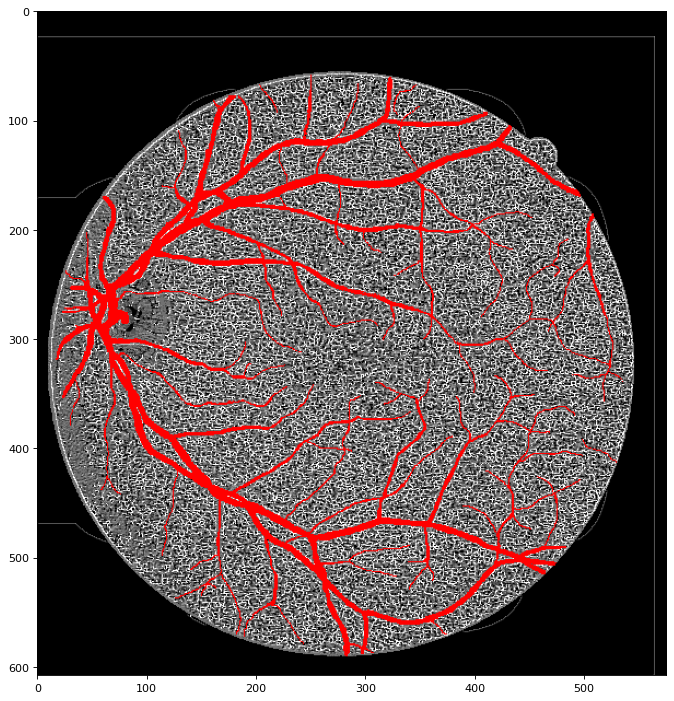

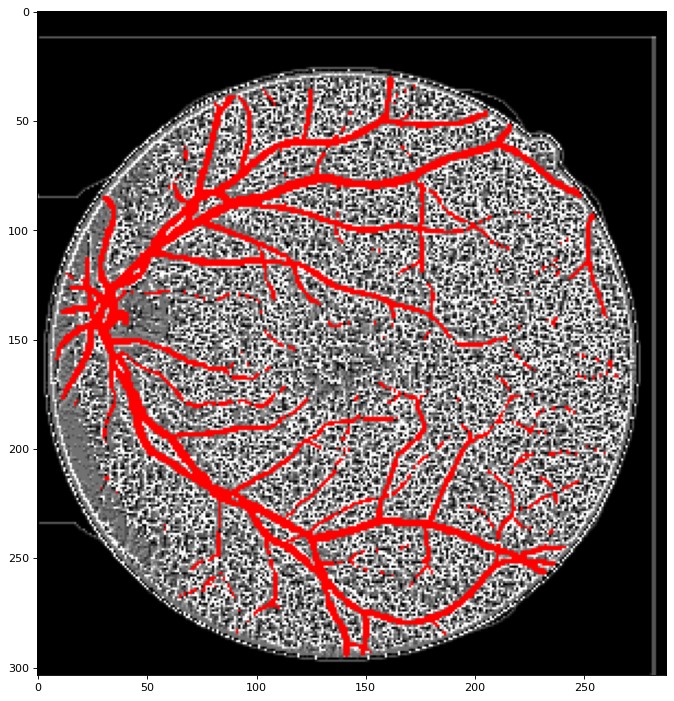

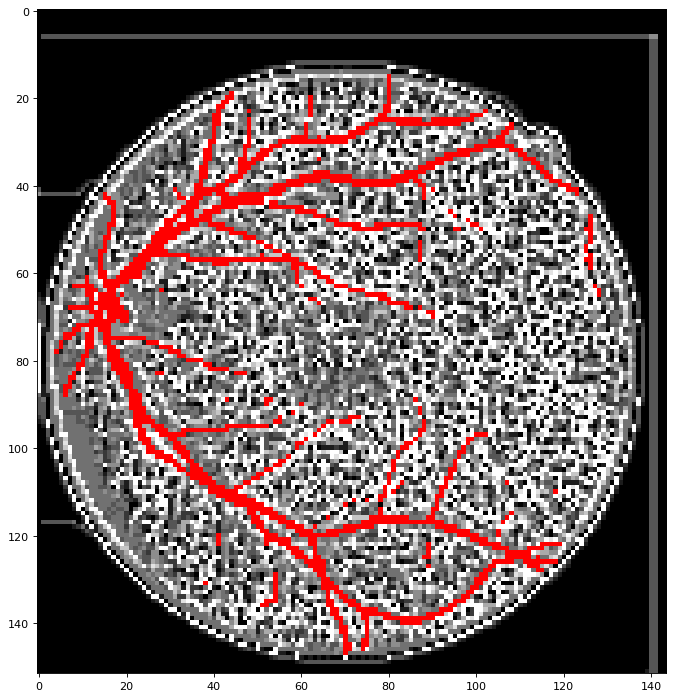

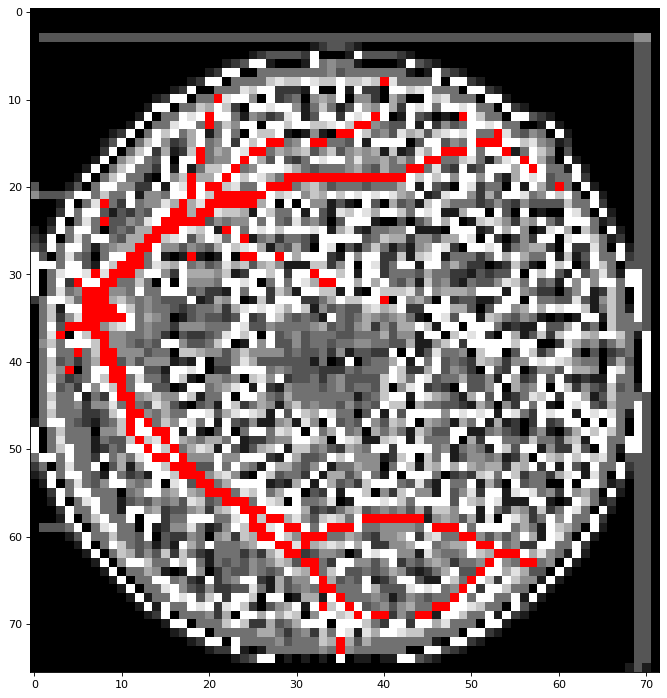

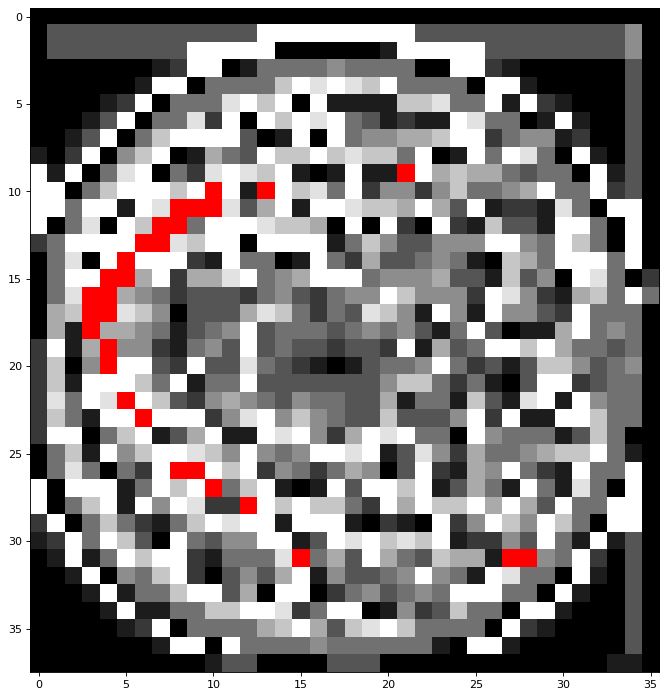

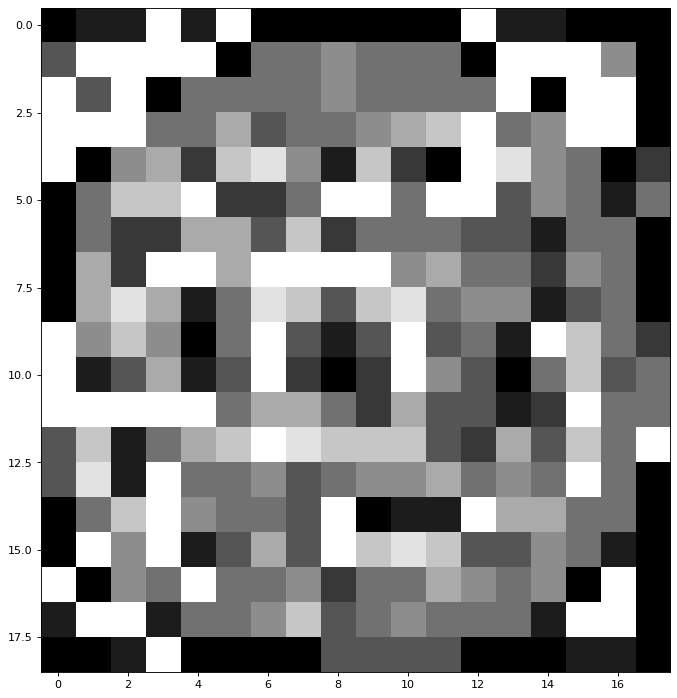

In [4]:
# Algorithm
PARAMETERS.INTERPOLATION_ALGORITHM = 'bicubic'

# Execution for the first image
main(single_exec=True)

#### Lanczos

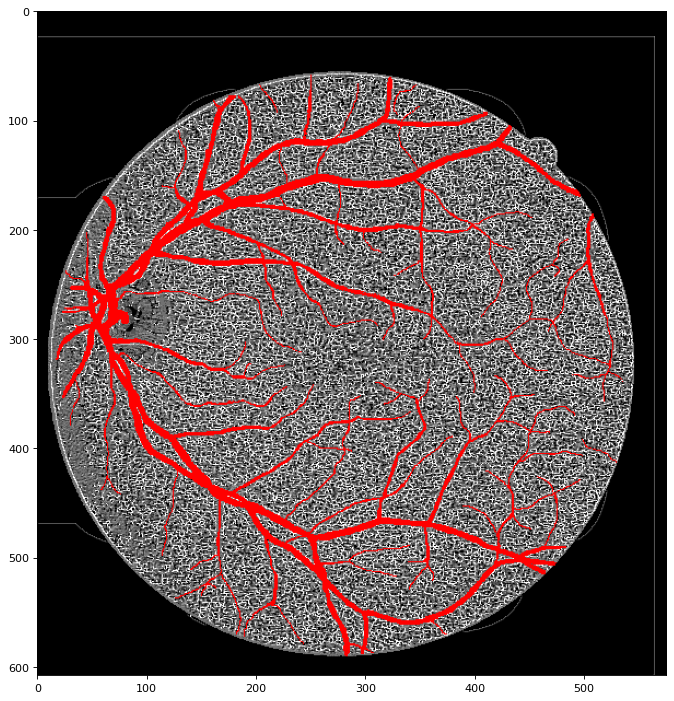

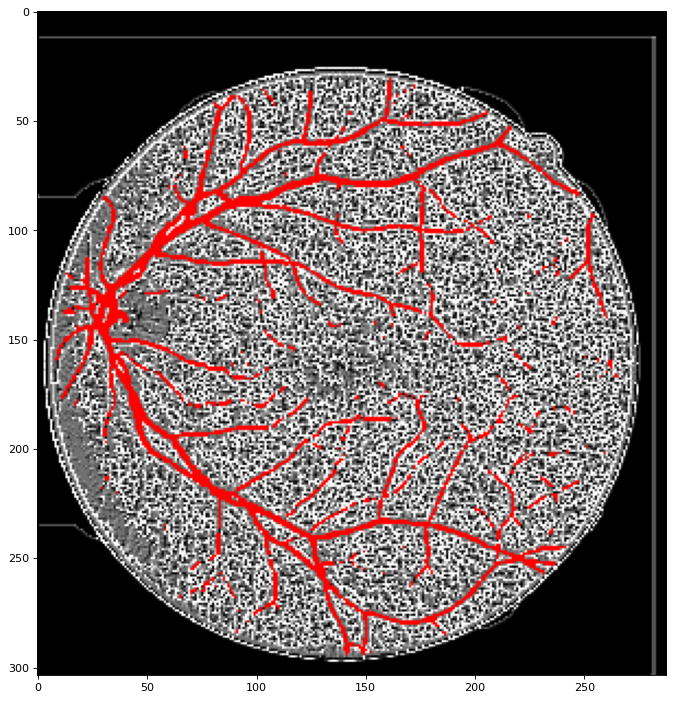

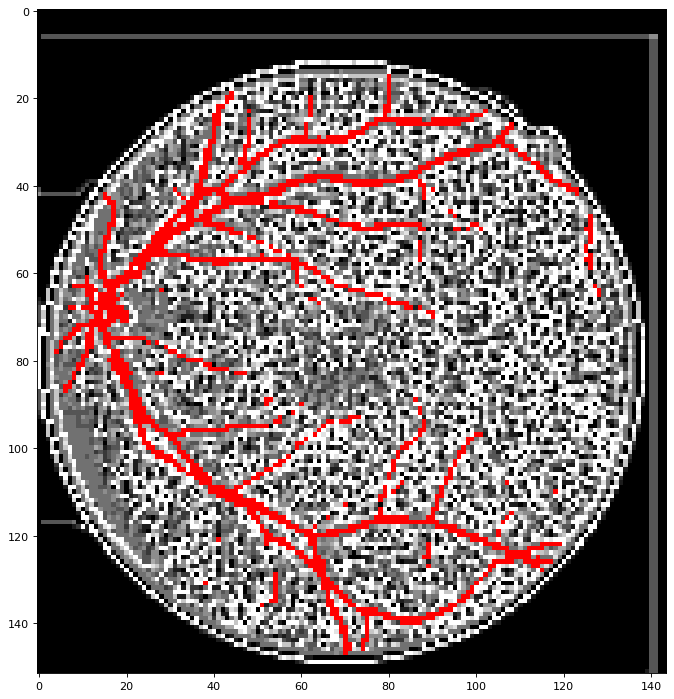

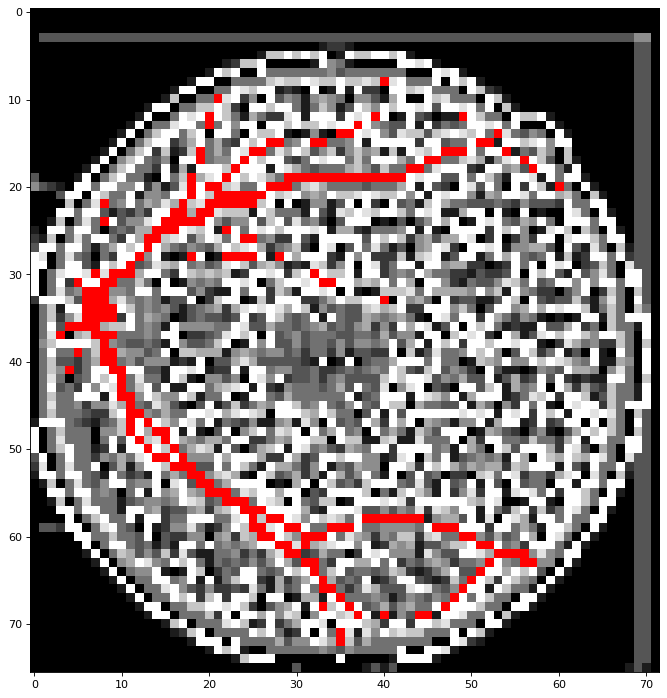

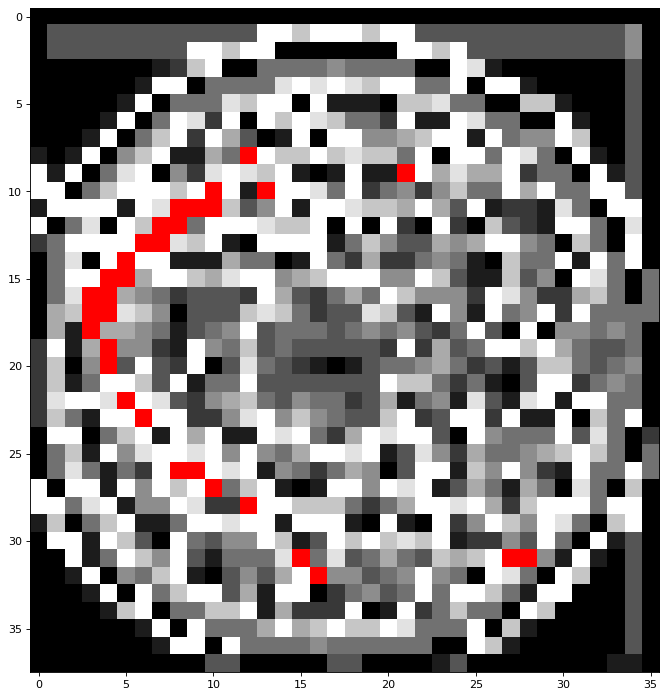

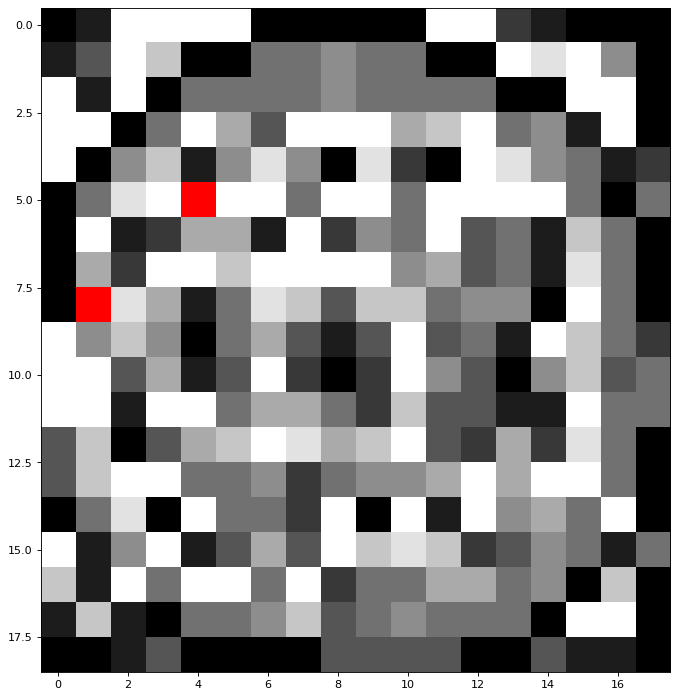

In [5]:
# Algorithm
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'

# Execution for the first image
main(single_exec=True)

### Variantes del operador LBP

Dado que la utilización de los datos por medio del clasificador se realiza de manera ordinal en las variables numéricas, se aplica una transformación sobre las variables de tipo binario, generando por lo tanto un elevado número de nuevas variables con un crecicimiento proporcional al número de categorías proporcionadas por el operador LBP, con lo que se ha escogido únicamente la utilización del operador en su configuración invariante a la rotación uniforme (**riu2**).

### Utilización de la intensidad original de las imágenes

Dado que la intensidad original de las imágenes en escala de grises aporta información adicional que puede ser empleada por el clasificador ya que las imágenes se encuentran normalizadas y generalmente los vasos sanguíneos proporcionan una intensidad similar entre sí, se comprueba el efecto proporcionado por su utilización, es decir, se generan bases de datos tanto con esta información adicional como sin ella.

### Balanceado de los datos

Así mismo, debido a que en el conjunto de datos generado cada instancia es un píxel de la imagen, la clasificación de las instancias como vaso sanguíneo se encuentra en una proporción muy inferior, lo que podría provocar un sesgo inicial en el clasificador. Con la finalidad de comprobar si este hecho es perjudicial sobre el poder predictivo del clasificador se realiza en algunas bases de datos una selección aleatoria, es decir, un muestreo, de píxeles etiquetados de forma negativa, equilibrando la proporción al 50% con los representativos de vasos sanguíneos.

### Utilización de diferentes escalas

Dado que se desconoce en qué reducción de escala es posible que la información proporcionada deje de aportar valor debido a la pérdida de calidad de los datos en el procedimiento de reescalado, se prueban diferentes configuraciones. Se toman valores entre 3 y 6 escalas.

### Escala x2

Otra configuración que se ha considerado de interés es el reescalado al doble de dimensiones respecto a la imagen original.

## Clasificación para las diferentes configuraciones de parametría (Grid Search)

De esta forma, se ha definido un rango de parámetros entorno a los cuales se ha realizado el cálculo de las BBDD con la finalidad de comprobar los resultados proporcionados por la clasificación basada en cada una de ellas.

In [6]:
VALID_PARAMETERS = {
    'LBP_METHOD': ['riu2'],
    'METHOD': ['get_pyramid_dataset'],
    'INTERPOLATION_ALGORITHM': ['nearest', 'lanczos', 'bicubic'],
    'BALANCE': [False, True],
    'N_SCALES': list(range(3, 7)),
    'GRAY_INTENSITY': [True, False],
    'X2SCALE': [False, True],
}

Para la definición y ejecución de la totalidad de las combinaciones de parametría en la generación de las bases de datos se emplea el siguiente código.

In [7]:
import PARAMETERS
from create_db import main
import itertools

dict_keys = list(VALID_PARAMETERS.keys())
for combination in itertools.product(*[VALID_PARAMETERS[k] for k in dict_keys]):
    print(combination)
    for i, v in enumerate(combination):
        setattr(PARAMETERS, dict_keys[i], v)
        PARAMETERS.FILE_EXTENSION = f"{PARAMETERS.LBP_METHOD}_{PARAMETERS.METHOD}_" \
                                    f"{PARAMETERS.INTERPOLATION_ALGORITHM}_balance-{PARAMETERS.BALANCE}_" \
                                    f"scales-{PARAMETERS.N_SCALES}_x2-{PARAMETERS.X2SCALE}" \
                                    f"_gray-intensity-{PARAMETERS.GRAY_INTENSITY}"
    # main()

('riu2', 'get_pyramid_dataset', 'nearest', False, 3, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, False, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, False, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, False, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, False, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 5, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 5, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 5, False, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 5, False, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 6, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 6, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 6, False, False)
('riu2', '

Con ello, los diferentes datasets son almacenados en ficheros comprimidos para ser utilizados posteriormente con un bucle similar en el que se lleva a cabo el proceso de clasificación.

In [8]:
from main import main
import pandas as pd
import os
from pathlib import Path

os.environ['GRID_SEARCH'] = 'TRUE'
skip_process = True

if skip_process:
    metrics = pd.read_csv('../Results/metrics.csv')
else:
    metrics = pd.DataFrame(columns=[
                'LBP', 'Method', 'Interpolation', 'Balance', 'n_scales', 'x2', 'Gray Intensity',
                'Accuracy', 'F1 score', 'tn', 'fp', 'fn', 'tp'
            ])
    parent_path = '..'
    for filename in Path(f"{parent_path}/DB").glob('train_train_*'):
        PARAMETERS.FILE_EXTENSION = str(filename).replace('train_train_', '').split('/')[-1].replace('.zip', '').replace('.pkl', '')
        properties = PARAMETERS.FILE_EXTENSION.replace(
            'get_pyramid_dataset', 'get-pyramid-dataset').replace(
            'get_datasets_by_scale', 'get-dataset-by-scale').split('_')
        PARAMETERS.LBP_METHOD = properties[0]
        PARAMETERS.METHOD = properties[1].replace(
            'get-pyramid-dataset', 'get_pyramid_dataset').replace('get-dataset-by-scale', 'get_datasets_by_scale')
        PARAMETERS.INTERPOLATION_ALGORITHM = properties[2]
        PARAMETERS.BALANCE = properties[3].replace('balance-', '') == 'True'
        PARAMETERS.N_SCALES = int(properties[4].replace('scales-', ''))
        PARAMETERS.X2SCALE = properties[5].replace('x2-', '') == 'True'
        PARAMETERS.GRAY_INTENSITY = properties[6].replace('gray-intensity-', '') == 'True'
        metrics = metrics.append(pd.DataFrame(
            (
                PARAMETERS.LBP_METHOD,
                PARAMETERS.METHOD,
                PARAMETERS.INTERPOLATION_ALGORITHM,
                PARAMETERS.BALANCE,
                PARAMETERS.N_SCALES,
                PARAMETERS.X2SCALE,
                PARAMETERS.GRAY_INTENSITY
            ) + main(),
            index=[
                'LBP', 'Method', 'Interpolation', 'Balance', 'n_scales', 'x2', 'Gray Intensity',
                'Accuracy', 'F1 score', 'tn', 'fp', 'fn', 'tp'
            ]
        ).T, ignore_index=True)
metrics.head()

Unnamed: 0   LBP               Method Interpolation  Balance  n_scales  \
0           0  riu2  get_pyramid_dataset       lanczos     True         6   
1           1  riu2  get_pyramid_dataset       lanczos     True         5   
2           2  riu2  get_pyramid_dataset       bicubic    False         4   
3           3  riu2  get_pyramid_dataset       nearest    False         3   
4           4  riu2  get_pyramid_dataset       lanczos     True         4   

      x2  Gray Intensity  Accuracy  F1 score       tn       fp      fn      tp  
0   True            True     0.730     0.487  3280750  1264326  208448  699526  
1  False            True     0.738     0.438   867146   320399   36330  138832  
2  False           False     0.876     0.410  1135470    52075  116498   58664  
3   True           False     0.871     0.000  4750180        0  700648       0  
4  False           False     0.728     0.423   857020   330525   39521  135641

## Análisis de los resultados obtenidos

A continuación, se obtienen una serie de estadísticas acerca del poder predictivo mostrado por cada parametría.

### Algoritmo de interpolación

In [9]:
metrics.groupby("Interpolation")["Accuracy"].describe()

count      mean       std    min      25%     50%      75%  \
Interpolation                                                               
bicubic         32.0  0.784437  0.081880  0.637  0.72650  0.7880  0.85800   
lanczos         32.0  0.783125  0.082717  0.650  0.72375  0.7855  0.85900   
nearest         32.0  0.781594  0.095063  0.602  0.70475  0.7945  0.87125   

                 max  
Interpolation         
bicubic        0.881  
lanczos        0.881  
nearest        0.876

In [10]:
metrics.groupby("Interpolation")["F1 score"].describe()

count      mean       std  min      25%     50%     75%    max
Interpolation                                                                
bicubic         32.0  0.402469  0.123319  0.0  0.38400  0.4380  0.4810  0.517
lanczos         32.0  0.388781  0.128090  0.0  0.38375  0.4305  0.4755  0.503
nearest         32.0  0.284625  0.126267  0.0  0.24500  0.3335  0.3800  0.409

Se observa que los mejores resultados, y más estables, son los obtenidos con la interpolación bicúbica, con resultados muy similares para lanczos.

### Balanceado de los datos

In [11]:
metrics.groupby("Balance")["Accuracy"].describe()

count      mean       std    min      25%    50%    75%    max
Balance                                                                
False     48.0  0.864250  0.015469  0.833  0.85475  0.871  0.876  0.881
True      48.0  0.701854  0.034526  0.602  0.68000  0.710  0.729  0.743

In [12]:
metrics.groupby("Balance")["F1 score"].describe()

count      mean       std    min   25%     50%     75%    max
Balance                                                               
False     48.0  0.303771  0.170004  0.000  0.22  0.3105  0.4540  0.517
True      48.0  0.413479  0.044465  0.307  0.38  0.4160  0.4385  0.495

Como cabía esperar, se obtiene un mayor porcentaje de acierto a costa de una menor tasa para la categoría no predominante, los vasos sanguíneos cuando se realiza un balanceado. Sin embargo, al no realizarlo los resultados son muy dispares, como se puede observar en la desviación típica, con lo que en algunas combinaciones parece favorable el disponer de una mayor cantidad de datos a entrenar en el clasificador.

### Número de escalas

In [13]:
metrics.groupby("n_scales")["Accuracy"].describe()

count      mean       std    min      25%     50%      75%    max
n_scales                                                                   
3          24.0  0.757042  0.105142  0.602  0.65725  0.7695  0.86825  0.872
4          24.0  0.781500  0.085073  0.675  0.69700  0.7820  0.87125  0.881
5          24.0  0.795417  0.075597  0.704  0.72175  0.7975  0.87250  0.881
6          24.0  0.798250  0.072992  0.703  0.73150  0.7980  0.87200  0.881

In [14]:
metrics.groupby("n_scales")["F1 score"].describe()

count      mean       std    min      25%     50%      75%    max
n_scales                                                                   
3          24.0  0.230333  0.163896  0.000  0.00000  0.3025  0.37400  0.392
4          24.0  0.355333  0.106128  0.084  0.29875  0.3945  0.43125  0.466
5          24.0  0.419917  0.076135  0.227  0.39500  0.4400  0.47925  0.494
6          24.0  0.428917  0.073996  0.251  0.39850  0.4390  0.48750  0.517

En lo relativo al número de escalas, parece que la posibilidad de disponer de una mayor cantidad de datos siempre es favorable, siendo el efecto cada vez menos relevante a medida que la calidad de la información (menores escalas) es inferior.

### Utilización de la escala x2

In [15]:
metrics.groupby("x2")["Accuracy"].describe()

count      mean       std    min      25%     50%      75%    max
x2                                                                      
False   48.0  0.794208  0.083606  0.650  0.72125  0.8035  0.87600  0.881
True    48.0  0.771896  0.087487  0.602  0.69925  0.7875  0.85425  0.875

In [16]:
metrics.groupby("x2")["F1 score"].describe()

count      mean       std  min      25%     50%      75%    max
x2                                                                    
False   48.0  0.374688  0.099051  0.0  0.34900  0.4005  0.43400  0.495
True    48.0  0.342562  0.163360  0.0  0.28325  0.3885  0.47825  0.517

Aunque en la mayoría de combinaciones de parámetros no tiene un efecto positivo, se puede observar que para algunas permite aumentar la capacidad de identificación de los vasos sanguíneos, obteniendo unos valores F1 superiores.

### Intensidad original

In [17]:
metrics.groupby("Gray Intensity")["Accuracy"].describe()

count      mean       std    min     25%     50%      75%  \
Gray Intensity                                                              
False            48.0  0.781917  0.086121  0.602  0.7090  0.7875  0.87100   
True             48.0  0.784187  0.086479  0.628  0.7115  0.7880  0.87125   

                  max  
Gray Intensity         
False           0.877  
True            0.881

In [18]:
metrics.groupby("Gray Intensity")["F1 score"].describe()

count      mean       std  min      25%     50%      75%  \
Gray Intensity                                                             
False            48.0  0.343708  0.139579  0.0  0.26850  0.3830  0.43225   
True             48.0  0.373542  0.130720  0.0  0.33075  0.4005  0.46825   

                  max  
Gray Intensity         
False           0.496  
True            0.517

De nuevo, una mayor cantidad de información permite la obtención de unos mejores resultados.

## Análisis de la parametría con mejor resultado

In [19]:
metrics.sort_values(by=['Accuracy'], ascending=False).head()

Unnamed: 0   LBP               Method Interpolation  Balance  n_scales  \
88          88  riu2  get_pyramid_dataset       bicubic    False         4   
65          65  riu2  get_pyramid_dataset       lanczos    False         6   
10          10  riu2  get_pyramid_dataset       lanczos    False         5   
70          70  riu2  get_pyramid_dataset       bicubic    False         6   
33          33  riu2  get_pyramid_dataset       lanczos    False         4   

       x2  Gray Intensity  Accuracy  F1 score       tn     fp      fn     tp  
88  False            True     0.881     0.466  1128842  58703  104080  71082  
65  False            True     0.881     0.485  1123444  64101   98620  76542  
10  False            True     0.881     0.481  1125798  61747  100058  75104  
70  False            True     0.880     0.495  1118762  68783   94824  80338  
33  False            True     0.880     0.445  1133777  53768  109642  65520

In [20]:
metrics.sort_values(by=['F1 score'], ascending=False).head()

Unnamed: 0   LBP               Method Interpolation  Balance  n_scales  \
27          27  riu2  get_pyramid_dataset       bicubic    False         6   
41          41  riu2  get_pyramid_dataset       lanczos    False         6   
35          35  riu2  get_pyramid_dataset       bicubic    False         6   
70          70  riu2  get_pyramid_dataset       bicubic    False         6   
5            5  riu2  get_pyramid_dataset       bicubic     True         6   

       x2  Gray Intensity  Accuracy  F1 score       tn       fp      fn  \
27   True            True     0.856     0.517  4243295   298032  488433   
41   True            True     0.856     0.503  4274483   270593  512095   
35   True           False     0.853     0.496  4256408   284919  515679   
70  False            True     0.880     0.495  1118762    68783   94824   
5    True           False     0.742     0.495  3352377  1188950  218621   

        tp  
27  421079  
41  395879  
35  393833  
70   80338  
5   690891

Dado que el objetivo del proyecto es la determinación automática de la presencia de vasos sanguíneos, se toma como mejor resultado aquel que proporciona un mayor valor de *F1 score*, que aun proporcionando una mayor cantidad de falsas detecciones que aquellos con una preción superior, permite alcanzar mejor el objetivo definido.

In [21]:
metrics.sort_values(by=['F1 score'], ascending=False).iloc[0, :].to_frame().T

Unnamed: 0   LBP               Method Interpolation Balance n_scales    x2  \
27         27  riu2  get_pyramid_dataset       bicubic   False        6  True   

   Gray Intensity Accuracy F1 score       tn      fp      fn      tp  
27           True    0.856    0.517  4243295  298032  488433  421079

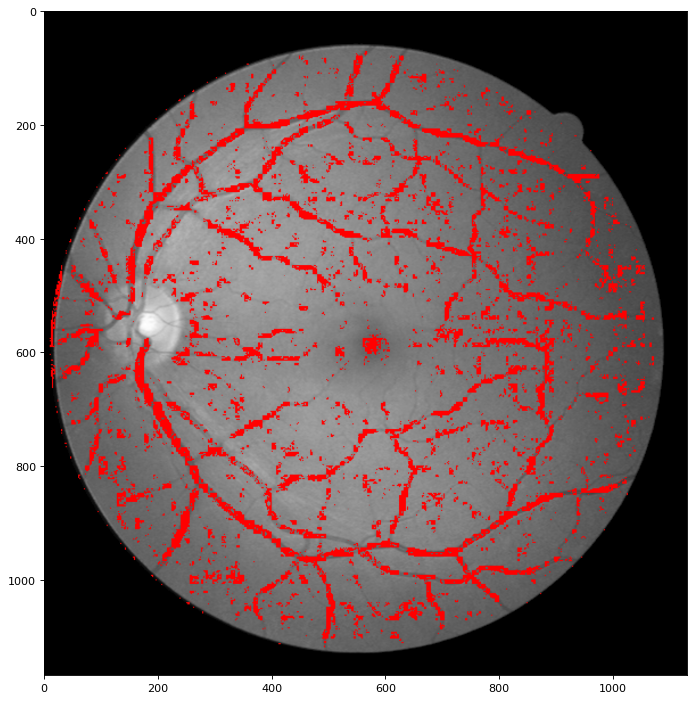

(0.856, 0.517, 4243295, 298032, 488433, 421079)

In [22]:
from main import main

PARAMETERS.LBP_METHOD = 'riu2'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'bicubic'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 6
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = f"{PARAMETERS.LBP_METHOD}_{PARAMETERS.METHOD}_{PARAMETERS.INTERPOLATION_ALGORITHM}_balance-{PARAMETERS.BALANCE}_scales-{PARAMETERS.N_SCALES}_x2-{PARAMETERS.X2SCALE}_gray-intensity-{PARAMETERS.GRAY_INTENSITY}"

PARAMETERS.PLOT = True

main(plot_once=True)